In [1]:
birdy <- read.csv("sparrow.csv")
birdy

Animal,Age,WingLen
<int>,<int>,<dbl>
1,3,1.47
2,4,2.08
3,5,1.99
4,6,2.95
5,8,3.31
6,9,2.41
7,10,3.75
8,11,4.03
9,12,4.56


In [2]:
options(repr.plot.width = 7, repr.plot.height = 5)
library(ggplot2)

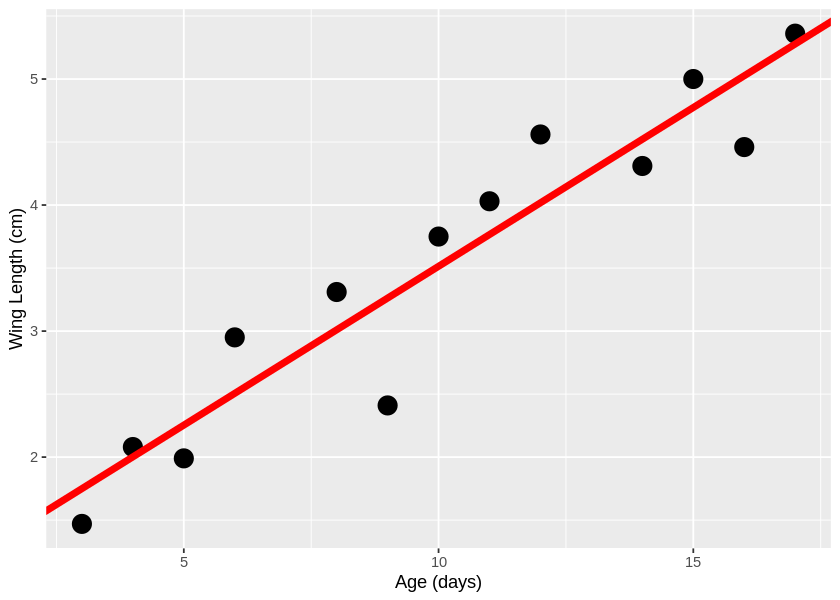

In [8]:
ggplot(birdy, aes(x = Age, y = WingLen)) +
  geom_point(size = 5) +
  geom_abline(intercept = 0.994, slope = 0.252, 
              colour = "red", linewidth = 2) +
  xlab("Age (days)") + ylab("Wing Length (cm)")

In [9]:
birdy$y_hat <- 0.994 + 0.252 * birdy$Age

In [11]:
birdy$resid <- birdy$WingLen - birdy$y_hat
birdy

Animal,Age,WingLen,y_hat,resid
<int>,<int>,<dbl>,<dbl>,<dbl>
1,3,1.47,1.750,-0.280
2,4,2.08,2.002,0.078
3,5,1.99,2.254,-0.264
4,6,2.95,2.506,0.444
5,8,3.31,3.010,0.300
6,9,2.41,3.262,-0.852
7,10,3.75,3.514,0.236
8,11,4.03,3.766,0.264
9,12,4.56,4.018,0.542


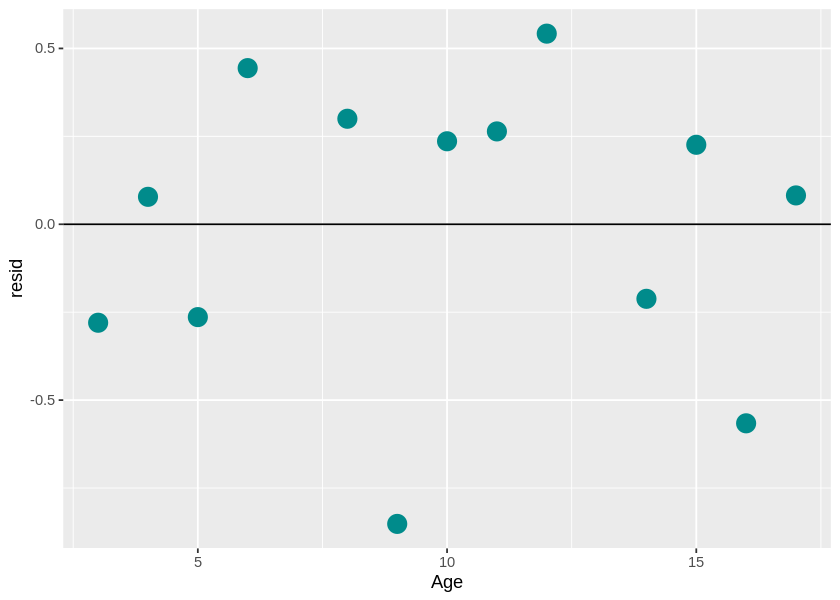

In [12]:
ggplot(birdy, aes(x = Age, y = resid)) +
  geom_point(size = 5, colour = "cyan4") +
  geom_hline(yintercept = 0)

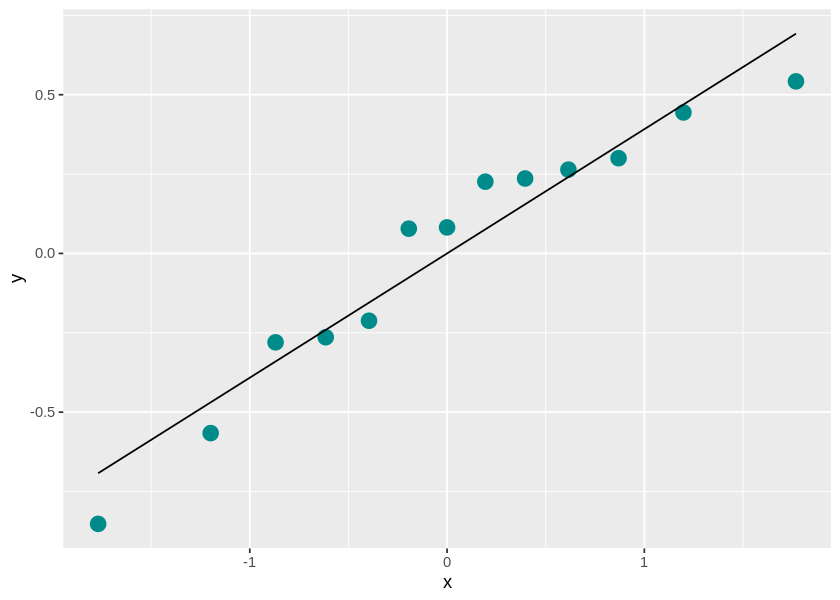

In [14]:
ggplot(birdy, aes(sample = resid)) +
  stat_qq(colour = "cyan4", size = 4) +
  stat_qq_line()

In [15]:
alpha <- 0.05

#Lower 
qt(alpha/2, df = 11)

#Upper 
qt(alpha/2, df = 11, lower.tail = FALSE)

[1] -2.200985

[1] 2.200985

In [17]:
pt(9.692, df = 11, lower.tail = FALSE) * 2

[1] 1.009703e-06

# R Cheat Codes

In [18]:
birdModel <- lm(WingLen ~ Age, data = birdy)
summary(birdModel)


Call:
lm(formula = WingLen ~ Age, data = birdy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85148 -0.26201  0.08035  0.26379  0.54142 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.99018    0.28944   3.421  0.00571 ** 
Age          0.25237    0.02641   9.557 1.16e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4274 on 11 degrees of freedom
Multiple R-squared:  0.8925,	Adjusted R-squared:  0.8827 
F-statistic: 91.34 on 1 and 11 DF,  p-value: 1.16e-06


In [19]:
sqrt(0.183)

[1] 0.427785

In [20]:
confint(birdModel)

,2.5 %,97.5 %
(Intercept),0.3531276,1.627236
Age,0.1942488,0.310484
